# Семинар 1. Введение в байесовскую статистику

На этом семинаре мы поупражняемся в решении задач на графы и применение теоремы Байеса 

### Задание 1.11

**Описание**:

Стандартный логический элемент XOR представлен в таблице снизу. Если мы видим, что выход элемента XOR равен 0, что мы можем сказать об A и B? В этом случае либо A и B оба равны 0, либо A и B оба равны 1. Это означает, что мы не знаем, в каком состоянии находился A — он с одинаковой вероятностью мог быть равен 1 или 0.

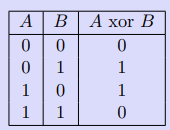

Теперь рассмотрим «мягкую» версию логического элемента XOR (soft XOR gate), представленную снищу, так что элемент стохастически выдает C = 1 в зависимости от своих входных сигналов, при этом дополнительно выполняется условие $A ⊥ ⊥ B$, а $p(A = 1) = p_a$, $p(B = 1) = p_b$.

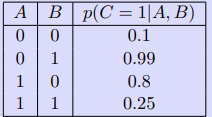

Требуется по входным p_a и p_b и вектору $p(C = 1|A, B)$ найти $p(A = 1|C = 0)$.

In [ ]:
def soft_xor(p_a: float, p_b: float, seed=42) -> float:
    
    # generate P(C = 1| A, B)
    # np.random.seed(seed)
    # p_cab = np.random.uniform(0, 1, 4)

    # example from book
    p_cab = [0.1, 0.99, 0.8, 0.25]

    # compute p(A = 1, C = 0)
    p_a1_c0 = p_a * ((1 - p_cab[2]) * (1 - p_b) + (1 - p_cab[3]) * p_b)

    # compute p(A = 0, C = 0)
    p_a0_c0 = (1 - p_a) * ((1 - p_cab[0]) * (1 - p_b) + (1-p_cab[1]) * p_b)

    # p(A = 1|C = 0) = p(A = 1, C = 0) / (p(A = 1, C = 0) + p(A = 0, C = 0))
    return p_a1_c0 / (p_a1_c0 + p_a0_c0)

p_a = 0.65
p_b = 0.77

result = soft_xor(0.65, 0.77)

print(f"p(A = 1|C = 0) = {result:.3f}")

p(A = 1|C = 0) = 0.844


### Задание 1.12

**Описание**: Рассмотрим следующую вымышленную научную информацию: Врачи обнаружили, что люди с болезнью Кройцфельдта-Джейкоба (БКД, KJ) почти всегда ели гамбургеры, следовательно, $p(Hamburger \space Eater | KJ) = p_{eat-kj}$. Вероятность того, что у человека будет БКД, в настоящее время довольно низка, примерно один случай на $N$ ($p_{kj}$). Предположим, что употребление большого количества гамбургеров довольно распространено, скажем,  $p(Hamburger \space Eater) = p_{eat}$. Какова вероятность того, что человек, употребляющий гамбургеры, заболеет болезнью Кройцфельдта-Джейкоба?

**Задание**: реализовать функцию, которая по входным $p_{kj}$ и $p(Hamburger \space Eater | KJ)$ и $p(Hamburger \space Eater)$ будет выдавать $p(KJ | Hamburger \space Eater)$

Проверьте правильность реализации функции, подставив значения $p(Hamburger \space Eater) = 0.5$,  $p_{kj} = 10^{-5}$, $p(Hamburger \space Eater | KJ) = 0.9$

Или 
$p(Hamburger \space Eater) = 0.001$,  $p_{kj} = 10^{-5}$, $p(Hamburger \space Eater | KJ) = 0.9$

In [215]:
def kj_proba(p_eat: float, p_eat_kj: float, p_kj: int) -> float:

    # p(KJ | Hamburger Eater) = p(Hamburger Eater | KJ) * p(KJ) / p(Hamburger Eater)
    p_kj_eat = p_eat_kj * p_kj / p_eat

    return p_kj_eat

p_kj = 1e-5
p_eater = 0.5
p_eater_kj=0.9

kj_proba(p_eat=p_eater, p_eat_kj=p_eater_kj, p_kj=p_kj)

1.8e-05

### Задание 1.13

**Описание**: 
Имеется N кубиков. Известно что после подбрасования всех кубиков по 1 разу, сумма на кубах равне S. Необходимо оценить вероятность выпадения значений s1, s2, ..., sn на кубах при заданной сумме.


In [2]:
import numpy as np

def n_dice_posterior(n, target_sum, dice_sides=6):
    
    # Using dynamic programming for count the number of possible 
    # dice values, that give us a certain sum
    
    # Maximum sum
    max_sum = n * dice_sides
    
    if target_sum < n or target_sum > max_sum:
        return 1/(dice_sides**n), 0.0
    
    dp = [[0] * (max_sum + 1) for _ in range(n + 1)]

    dp[0][0] = 1
    
    for k in range(1, n + 1):
        for s in range(1, max_sum + 1):
            # Sum all pissibilities for the last dice
            for value in range(1, min(dice_sides, s) + 1):
                dp[k][s] += dp[k-1][s-value]
    
    count_valid = dp[n][target_sum]
    
    # P(s_1, ..., s_n)^(-1)
    prior = dice_sides ** n

    # P(t = S | s_1, ..., s_n)
    likelihood = 1
    
    if count_valid > 0:
        posterior_prob = 1 / count_valid
        
        # P(t = 9)
        target_p = ((likelihood * prior) * posterior_prob) ** (-1)
    else:
        posterior_prob = 0
        target_p = 0
    


    return posterior_prob, target_p

n = 5 # number of dice
target_sum = 15

posterior_prob, target_p = n_dice_posterior(n=n, target_sum=target_sum)

print(f"P(s_1, ..., s_{n} | t = {target_sum}) = {posterior_prob:.5f}")
print(f"P(t = {target_sum}) = {target_p:.5f}")

P(s_1, ..., s_5 | t = 15) = 0.00154
P(t = 15) = 0.08372


### Задача 1.22

**Описание**:

Мы рассматриваем расширение примера со взрывами. В этом расширении есть два взрыва в точках $( s_1)$ и $( s_2 )$, а наблюдаемое значение на датчике $(i)$ равно:
$$
v_i = \frac{1}{d_i^2(1) + 0.1} + \frac{1}{d_i^2(2) + 0.1} + \sigma \epsilon_i\
$$
где $( d_i(1), d_i(2) )$ — расстояния от взрыва 1 и взрыва 2 до датчика соответственно; $( \sigma )$ — стандартное отклонение гауссовского шума датчика, а шум $( \epsilon_i )$ берется из гауссовского распределения с нулевым средним и единичной дисперсией, независимо для каждого датчика.

Данные генерируются с помощью класса ExplosionSensorData, в котором положение датчиков предполарается равномерном по окружности радиуса $R$. Предполагая, что априорные положения взрывов независимы и равномерны:

1. **Рассчитайте апостериорное распределение** $( p(s_1 | v) )$ и постройте изображение, аналогичное рисунку ниже, которое визуализирует это апостериорное распределение.

2. **Сравнение гипотез**:  
   Обозначим $( H_2 )$ — гипотезу о наличии двух взрывов,  
   $( H_1 )$ — гипотезу о наличии только одного взрыва.  
   Вычислите значение $( \log p(v | H_2)$ - $\log p(v | H_1) )$.

3. **Интерпретация**:  
   Предполагая, что у нас нет априорных предпочтений, т.е. $( p(H_1) = p(H_2) = \text{const.} )$, объясните, почему разность $( \log p(v | H_2) - \log p(v | H_1))$ связана с вероятностью того, что имело место два взрыва, а не один.

4. **Вычислительная сложность**:  
   Если мы предположим, что было $( K)$ взрывов, объясните вычислительную сложность расчета $( \log p(v | H_K) )$.

   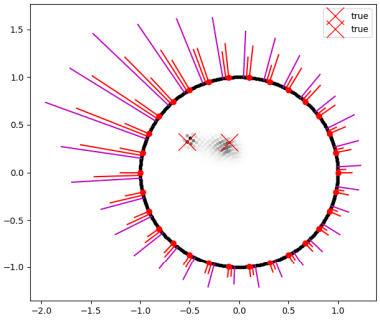


In [19]:
import numpy as np

class ExplosionSensorData:
    def __init__(self, L=1.0, N_sensors=50, R=None, center=None, seed=42):
        self.L = L
        self.rng = np.random.RandomState(seed)
        self.R = R or L/2.5        # radius of the circle
        self.center = center or (L/2, L/2)

        # sensors are placed on the cirle
        angles = np.linspace(0, 2*np.pi, N_sensors, endpoint=False)
        x_sensors = self.center[0] + self.R * np.cos(angles)
        y_sensors = self.center[1] + self.R * np.sin(angles)
        self.sensors = np.column_stack([x_sensors, y_sensors])  # (N, 2)

    # sample true positions of explosions
    def sample_explosions(self):
        s1 = self.rng.uniform(0, self.L, 2)
        s2 = self.rng.uniform(0, self.L, 2)
        return s1, s2

    # generates sensors data with noise
    def generate_data(self, s1, s2, sigma=0.1):
        N = len(self.sensors)
        v = np.zeros(N)
        eps = self.rng.normal(0, 1, N)
        for i, sensor in enumerate(self.sensors):
            d1 = np.linalg.norm(sensor - s1)
            d2 = np.linalg.norm(sensor - s2)
            v[i] = 1 / (d1**2 + 0.1) + 1 / (d2**2 + 0.1) + sigma * eps[i]
        return v

    # generate support grid for intergation
    def grid(self, n_pts=128):
        x = np.linspace(0, self.L, n_pts)
        y = np.linspace(0, self.L, n_pts)
        return np.meshgrid(x, y)


The true positions of the explosions:
s1 = [0.37454012 0.95071431]
s2 = [0.73199394 0.59865848]

[1] Computing p(s1|v)...


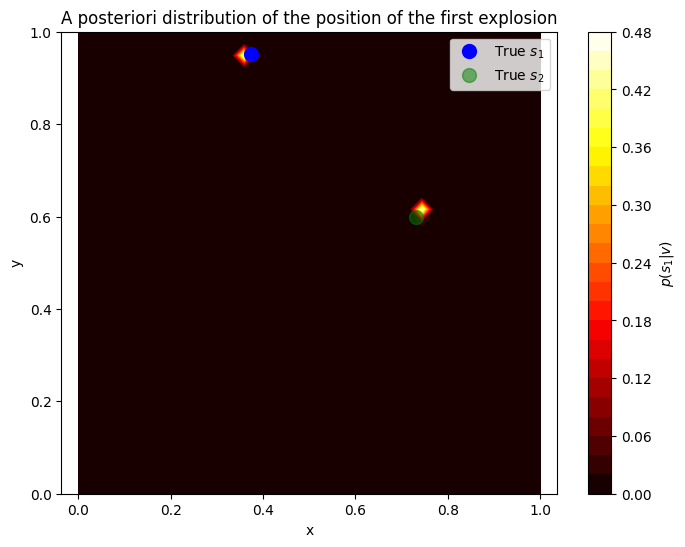


[2] Calculating log-likelihood hypotheses...
log p(v | H2) = -79.626
log p(v | H1) = -33387.332

log p(v|H2) - log p(v|H1) = 33307.706
→ The data support the two-explosion hypothesis. (H2).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import logsumexp

def log_likelihood_H2(v, s1, s2, sensors, sigma):

    f_pred = np.zeros(len(sensors))
    for i, s in enumerate(sensors):
        d1 = np.linalg.norm(s - s1)
        d2 = np.linalg.norm(s - s2)
        f_pred[i] = 1/(d1**2 + 0.1) + 1/(d2**2 + 0.1)
    return -0.5 * np.sum(((v - f_pred) / sigma) ** 2) - len(sensors) * np.log(sigma * np.sqrt(2 * np.pi))

def log_likelihood_H1(v, s, sensors, sigma):

    f_pred = np.zeros(len(sensors))
    for i, sen in enumerate(sensors):
        d = np.linalg.norm(sen - s)
        f_pred[i] = 1/(d**2 + 0.1)
    return -0.5 * np.sum(((v - f_pred) / sigma) ** 2) - len(sensors) * np.log(sigma * np.sqrt(2 * np.pi))


np.random.seed(42) 
exp_data = ExplosionSensorData(L=1.0, N_sensors=50, seed=42)
s1_true, s2_true = exp_data.sample_explosions()
sigma = 0.1 
v = exp_data.generate_data(s1_true, s2_true, sigma=sigma)

print("The true positions of the explosions:")
print(f"s1 = {s1_true}")
print(f"s2 = {s2_true}")


n_pts = 40  # 40x40 = 1600 points
X, Y = exp_data.grid(n_pts)
grid_points = np.column_stack([X.ravel(), Y.ravel()])
n_grid = len(grid_points)

print("\n[1] Computing p(s1|v)...")

log_posterior_s1 = np.full((n_pts, n_pts), -np.inf)

# To speed things up, we'll pre-calculate the contributions of each sensor for all grid points.
# This will allow us to quickly calculate f(s1,s2) for any pair.
sensor_contrib = np.zeros((len(exp_data.sensors), n_grid))
for i, sen in enumerate(exp_data.sensors):
    distances = np.linalg.norm(grid_points - sen, axis=1)
    sensor_contrib[i, :] = 1/(distances**2 + 0.1)

# Calculate logprob for s1
for idx_s1 in range(n_grid):
    s1 = grid_points[idx_s1]

    f1 = sensor_contrib[:, idx_s1]

    # Integrate over s2
    log_liks_s2 = np.zeros(n_grid)
    for idx_s2 in range(n_grid):
        s2 = grid_points[idx_s2]
        f2 = sensor_contrib[:, idx_s2]
        f_total = f1 + f2
        log_lik = -0.5 * np.sum(((v - f_total) / sigma) ** 2)
        log_liks_s2[idx_s2] = log_lik

    log_integral = logsumexp(log_liks_s2) - np.log(n_grid)
    log_posterior_s1.ravel()[idx_s1] = log_integral

# Normalize
log_posterior_s1 -= logsumexp(log_posterior_s1.ravel())
posterior_s1 = np.exp(log_posterior_s1)
posterior_s1 /= posterior_s1.sum()

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, posterior_s1, levels=30, cmap='hot')
plt.colorbar(label='$p(s_1 | v)$')
plt.plot(s1_true[0], s1_true[1], 'bo', markersize=10, label='True $s_1$')
plt.plot(s2_true[0], s2_true[1], 'go', markersize=10, label='True $s_2$', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('A posteriori distribution of the position of the first explosion')
plt.legend()
plt.axis('equal')
plt.show()

print("\n[2] Calculating log-likelihood hypotheses...")

# --- H2: 2 explosions ---
log_ev_H2 = -np.inf
for idx1 in range(n_grid):
    s1 = grid_points[idx1]
    f1 = sensor_contrib[:, idx1]
    for idx2 in range(n_grid):
        s2 = grid_points[idx2]
        f2 = sensor_contrib[:, idx2]
        f_total = f1 + f2
        log_lik = -0.5 * np.sum(((v - f_total) / sigma) ** 2)
        log_ev_H2 = np.logaddexp(log_ev_H2, log_lik)

log_ev_H2 += 2 * np.log(1.0 / (exp_data.L**2))
log_ev_H2 -= 2 * np.log(n_grid)
print(f"log p(v | H2) = {log_ev_H2:.3f}")

# --- H1: one explosion ---
f1_contrib = sensor_contrib.copy() 

log_ev_H1 = -np.inf
for idx in range(n_grid):
    f = f1_contrib[:, idx]
    log_lik = -0.5 * np.sum(((v - f) / sigma) ** 2)
    log_ev_H1 = np.logaddexp(log_ev_H1, log_lik)
log_ev_H1 += np.log(1.0 / (exp_data.L**2))
log_ev_H1 -= np.log(n_grid)
print(f"log p(v | H1) = {log_ev_H1:.3f}")

# Difference
log_BF = log_ev_H2 - log_ev_H1
print(f"\nlog p(v|H2) - log p(v|H1) = {log_BF:.3f}")
if log_BF > 0:
    print("→ The data support the two-explosion hypothesis. (H2).")
else:
    print("→ The data support the single-explosion hypothesis. (H1).")


### Задание 2.2

**Описание**: 
Для симметричной матрицы смежности размера $N \times N$ написать алгоритм для нахождения всех связных компонент

In [ ]:
from collections import deque

def find_connected_components(adjacency_matrix, mode='dfs'):

    n = len(adjacency_matrix)
    visited = [False] * n
    components = []
    
    def dfs(start, current_component):
        stack = [start]
        visited[start] = True
        
        while stack:
            vertex = stack.pop()
            current_component.append(vertex)
            
            for neighbour in range(n):
                if adjacency_matrix[vertex][neighbour] == 1 and not visited[neighbour]:
                    visited[neighbour] = True
                    stack.append(neighbour)

    def bfs(start, visited, matrix, component):

        queue = deque([start])
        visited[start] = True
        
        while queue:
            vertex = queue.popleft()
            component.append(vertex)
            
            for neighbour in range(len(matrix)):
                if matrix[vertex][neighbour] == 1 and not visited[neighbour]:
                    visited[neighbour] = True
                    queue.append(neighbour)
    
    if mode == 'dfs':
        for vertex in range(n):
            if not visited[vertex]:
                current_component = []
                dfs(vertex, current_component)
                components.append(sorted(current_component))
    else:
        for vertex in range(n):
            if not visited[vertex]:
                current_component = []
                bfs(vertex, visited, adjacency_matrix, current_component)
                components.append(sorted(current_component))
    
    return components


if __name__ == "__main__":

    matrix = [
        [0, 1, 1, 0, 0, 0],
        [1, 0, 1, 0, 0, 0], 
        [1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0],  
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0], 
    ]
    
    comps = find_connected_components(matrix, mode='bfs')
    for i, comp in enumerate(comps):
        print(f"Компонента {i + 1}: {comp}")

Компонента 1: [0, 1, 2]
Компонента 2: [3, 4]
Компонента 3: [5]


### Задание 2.6

**Описание**:
Файл wiki_adj.txt содержит случайную выборку из 1000 авторов Вики, причем связь между двумя авторами устанавливается, если они «знают» друг друга (см. snap.stanford.edu/data/wiki-Vote.html).
 
Предположим, что если i «знает» j, то j «знает» i. Постройте гистограмму расстояния (длины кратчайшего пути между двумя пользователями на графе, соответствующем матрице смежности) между всеми пользователями на основе расстояний от 1 до 20. То есть, бин n(s) в гистограмме содержит количество пар с расстоянием s.

In [220]:
with open("wiki_adj.txt", "r") as f:
    lines = f.readlines()
    pairs = []
    for line in lines:
        pairs.append(list(map(int, line.replace('\n', '').split(' '))))

all_ind = np.unique(pairs)

new_indices = {val: i for i, val in enumerate(all_ind.tolist())}

n = len(all_ind)
adj_matrix = np.zeros((n, n))

for i, j in pairs:
    adj_matrix[i, j] = 1

All pairs with distance 1-20: 131189


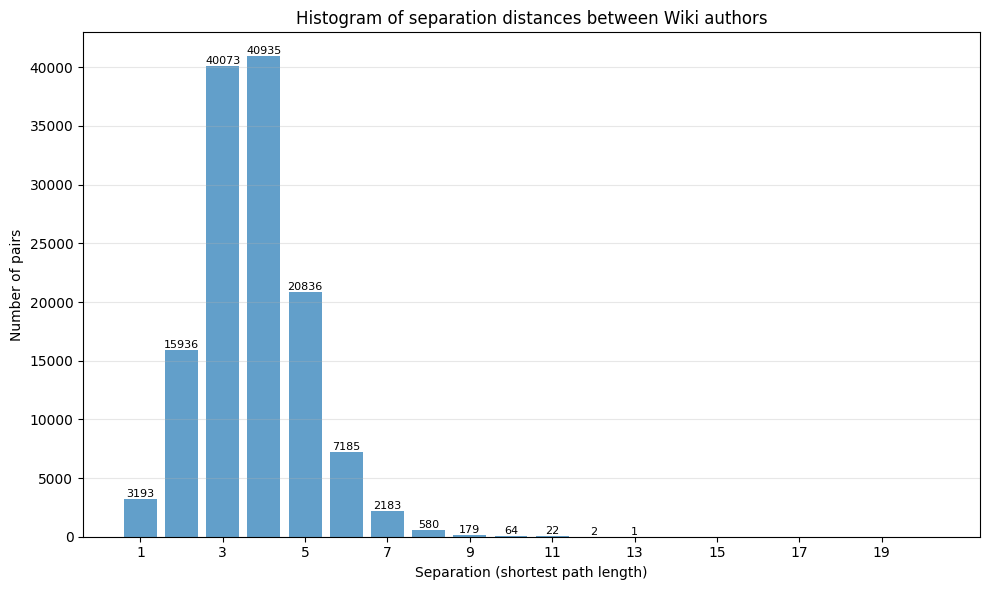

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque


def bfs_shortest_paths(start, adj_matrix, max_dist=20):

    """
    Applies BFS to find shortest paths from start vertex to all another vertecies
    """
    n = adj_matrix.shape[0]
    distances = np.full(n, -1, dtype=int)
    distances[start] = 0
    
    queue = deque([start])
    
    while queue:
        current = queue.popleft()
        current_dist = distances[current]
        
        # If there are no maximum distance, go futher
        if current_dist >= max_dist:
            continue
            
        # Find all neighbours
        neighbors = np.where(adj_matrix[current] == 1)[0]
        for neighbor in neighbors:
            if distances[neighbor] == -1:
                distances[neighbor] = current_dist + 1
                queue.append(neighbor)
    
    return distances


if __name__ == "__main__":

    n = adj_matrix.shape[0]
    max_separation = 20
    histogram = np.zeros(max_separation + 1, dtype=int)
    total_pairs = 0

    # Start BFS for each vertex
    for i in range(n):
        distances = bfs_shortest_paths(i, adj_matrix, max_separation)
        
        # Count distances for j > i
        for j in range(i + 1, n):
            dist = distances[j]
            if 1 <= dist <= max_separation:
                histogram[dist] += 1
                total_pairs += 1

    print(f"All pairs with distance 1-20: {total_pairs}")

    plt.figure(figsize=(10, 6))
    s_values = range(1, max_separation + 1)
    bars = plt.bar(s_values, histogram[1:], alpha=0.7)

    plt.xlabel('Separation (shortest path length)')
    plt.ylabel('Number of pairs')
    plt.title('Histogram of separation distances between Wiki authors')
    plt.xticks(range(1, 21, 2)) 
    plt.grid(axis='y', alpha=0.3)

    for bar, count in zip(bars, histogram[1:]):
        if count > 0:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
                    str(count), ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()

### Задание 2.7

**Описание**:

Файл cliques.txt содержит список из 100 клик, определенных на графе с 10 узлами. Ваша задача — вернуть набор уникальных максимальных клик, исключая клики, которые полностью содержатся внутри другой.
Найдя клику, вы можете представить ее в двоичной форме, например, так:

(1110011110)

что означает, что эта клика содержит переменные 1, 2, 3, 6, 7, 8, 9, читаемые слева направо. Преобразовав это двоичное представление в десятичное (где крайний правый бит — это единицы, а крайний левый — $2^9$), это соответствует
числу 926. Используя это десятичное представление, запишите список уникальных клик, упорядоченных от наименьшего десятичного представления к наибольшему. Подробно опишите этапы алгоритма, который вы используете для поиска этих уникальных клик.

In [ ]:
def parse_cliques(filename):
    """Читает клики из файла, преобразует в множества узлов."""
    cliques = []
    cliques_bit = []
    with open(filename, 'r') as f:
        for line in f:
            line = line.strip()
            if line.startswith('(') and line.endswith(')'):
                line = line[1:-1]  # delete brakets
            bitstring = line.strip()
            cliques_bit.append(bitstring)
            # tranform to a set of indices
            clique_set = {i for i, bit in enumerate(bitstring) if bit == '1'}
            cliques.append(clique_set)
    return cliques, cliques_bit


In [ ]:
def find_max_cluques(clique_list):

    max_indices = []

    for i, clique_i in enumerate(clique_list):
        is_maximal = True

        # check whether clique_i is a subset of another clique
        for j, clique_j in enumerate(clique_list):
            if i == j:
                continue
            
            # if clique_i is in clique_j
            if clique_i.issubset(clique_j) and clique_i != clique_j:
                is_maximal = False
                break

        if is_maximal:
            max_indices.append(i)

    return max_indices

In [ ]:
from operator import itemgetter

if __name__ == "__main__":

    cliques, cliques_bit = parse_cliques("cliques.txt")

    max_indices = find_max_cluques(cliques)

    max_values = itemgetter(*max_indices)
    max_cliques, max_cliques_bit = max_values(cliques), max_values(cliques_bit) 

    max_cliques_int = sorted([int(clique, 2) for clique in max_cliques_bit])

    print(f"Maximum cliques are: {max_cliques_int}")

FileNotFoundError: [Errno 2] No such file or directory: 'cliques.txt'